In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot

First we load ISAs stock and USD price in dataframes

In [53]:
df_isa = pd.read_csv('data/ISA.csv')
df_isa['fecha'] = pd.to_datetime(df_isa['fecha'])
df_isa = df_isa.set_index('fecha')

In [54]:
df_usd = pd.read_csv('data/USD-COP.csv')

In [55]:
df_isa.head()

,Nemotecnico,Cantidad,Volumen,Precio Cierre,Precio Mayor,Precio Medio,Precio Menor,Variacion%,Variacion Absoluta
fecha,,,,,,,,,
2003-07-03,ISA,147514,153392851,1041.0,1041.0,1039.8528,1038.0,0.39,4.0
2003-07-04,ISA,242684,252284203,1040.0,1040.0,1039.5585,1037.0,-0.10,-1.0
2003-07-07,ISA,148226,154115627,1040.0,1040.0,1039.7341,1039.0,0.00,0.0
2003-07-08,ISA,595995,609217622,1018.0,1030.0,1022.1858,1015.0,-2.12,-22.0
2003-07-09,ISA,171184,173275330,1013.0,1020.0,1012.2169,1010.0,-0.49,-5.0


We check at the usd dataframe structure

In [56]:
df_usd.head()

,Fecha,Último,Apertura,Máximo,Mínimo,% var.
0,23.05.2022,"3,942.67","3,972.00","3,994.00","3,925.08",-0.74%
1,22.05.2022,"3,972.00","3,979.33","3,979.33","3,972.00",0.18%
2,20.05.2022,"3,964.95","4,054.72","4,055.20","3,959.00",-2.04%
3,19.05.2022,"4,047.67","4,072.96","4,072.96","4,037.00",-0.45%
4,18.05.2022,"4,065.91","4,030.50","4,074.75","4,018.63",1.06%


In [57]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4927 entries, 0 to 4926
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     4927 non-null   object
 1   Último    4927 non-null   object
 2   Apertura  4927 non-null   object
 3   Máximo    4927 non-null   object
 4   Mínimo    4927 non-null   object
 5   % var.    4927 non-null   object
dtypes: object(6)
memory usage: 231.1+ KB


This dataset contains 4927 rows with no missing values corresponding to the USD value in COP from 2003-07-03 till 2022-12-05


We want to change the datatypes and set the "Fecha" column as the index, this to plot a little easier

In [58]:
df_usd['Fecha'] = pd.to_datetime(df_usd['Fecha'])
df_usd = df_usd.set_index('Fecha')

Removing commas from numerical values

In [59]:
df_usd['Último'] = df_usd['Último'].replace(",","", regex=True)
df_usd['Apertura'] = df_usd['Apertura'].replace(",","", regex=True)
df_usd['Máximo'] = df_usd['Máximo'].replace(",","", regex=True)
df_usd['Mínimo'] = df_usd['Mínimo'].replace(",","", regex=True)

Also we modify the types of our columns

In [60]:
df_usd['Último'] = df_usd['Último'].astype('float64')
df_usd['Apertura'] = df_usd['Apertura'].astype('float32')
df_usd['Máximo'] = df_usd['Máximo'].astype('float32')
df_usd['Mínimo'] = df_usd['Mínimo'].astype('float32')


We remove the % sign from our "% var." column, and also rename it so it has a better name

In [61]:
df_usd['Variacion Porcentual'] = df_usd['% var.'].str.rstrip('%').astype('float32')

In [62]:
df_usd.drop('% var.', inplace=True, axis=1)

In [63]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4927 entries, 2022-05-23 to 2003-07-03
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Último                4927 non-null   float64
 1   Apertura              4927 non-null   float32
 2   Máximo                4927 non-null   float32
 3   Mínimo                4927 non-null   float32
 4   Variacion Porcentual  4927 non-null   float32
dtypes: float32(4), float64(1)
memory usage: 154.0 KB


The dataframe looks much better now, we can plot the last value of the USD vs COP by day

In [69]:
df_usd.head()

,Último,Apertura,Máximo,Mínimo,Variacion Porcentual
Fecha,,,,,
2022-05-23,3942.67,3972.000000,3994.000000,3925.080078,-0.74
2022-05-22,3972.00,3979.330078,3979.330078,3972.000000,0.18
2022-05-20,3964.95,4054.719971,4055.199951,3959.000000,-2.04
2022-05-19,4047.67,4072.959961,4072.959961,4037.000000,-0.45
2022-05-18,4065.91,4030.500000,4074.750000,4018.629883,1.06


## Plotting USD COP over time

First we sort our dataframe by the date 

In [74]:
df_usd.sort_values(by='Fecha')

,Último,Apertura,Máximo,Mínimo,Variacion Porcentual
Fecha,,,,,
2003-07-03,2818.25,2815.000000,2818.750000,2810.300049,0.07
2003-07-04,2817.30,2815.000000,2824.100098,2814.300049,-0.03
2003-07-07,2834.50,2816.500000,2834.800049,2813.500000,0.61
2003-07-08,2853.75,2833.000000,2855.550049,2830.100098,0.68
2003-07-09,2849.75,2853.000000,2855.250000,2830.000000,-0.14
...,...,...,...,...,...
2022-11-04,3733.82,3757.000000,3762.000000,3732.010010,-0.48
2022-11-05,4076.70,4078.000000,4105.000000,4065.550049,0.14
2022-12-01,3970.51,3991.909912,3996.000000,3961.669922,-0.44


''

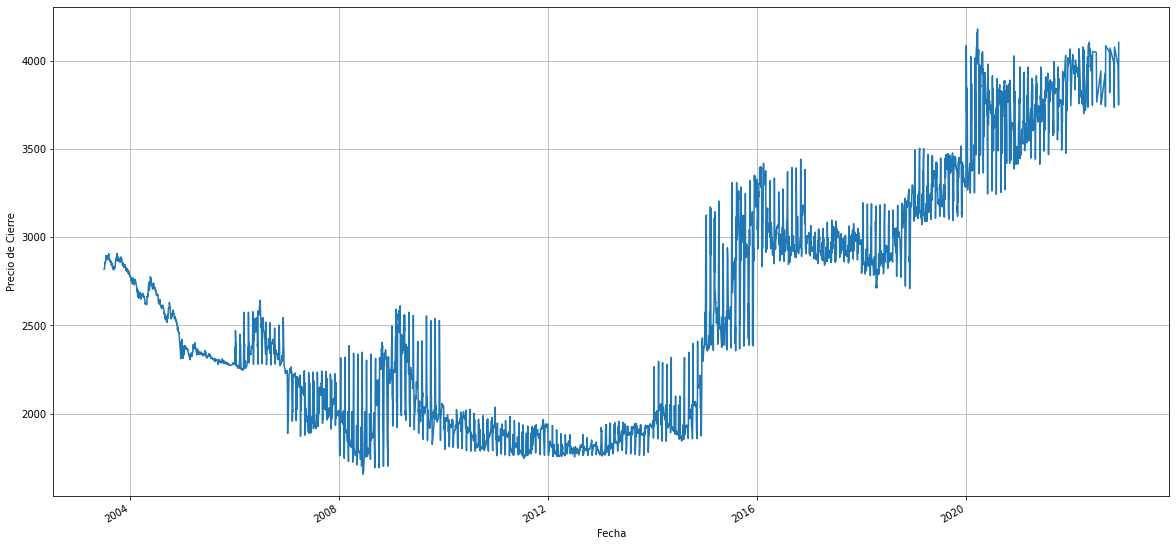

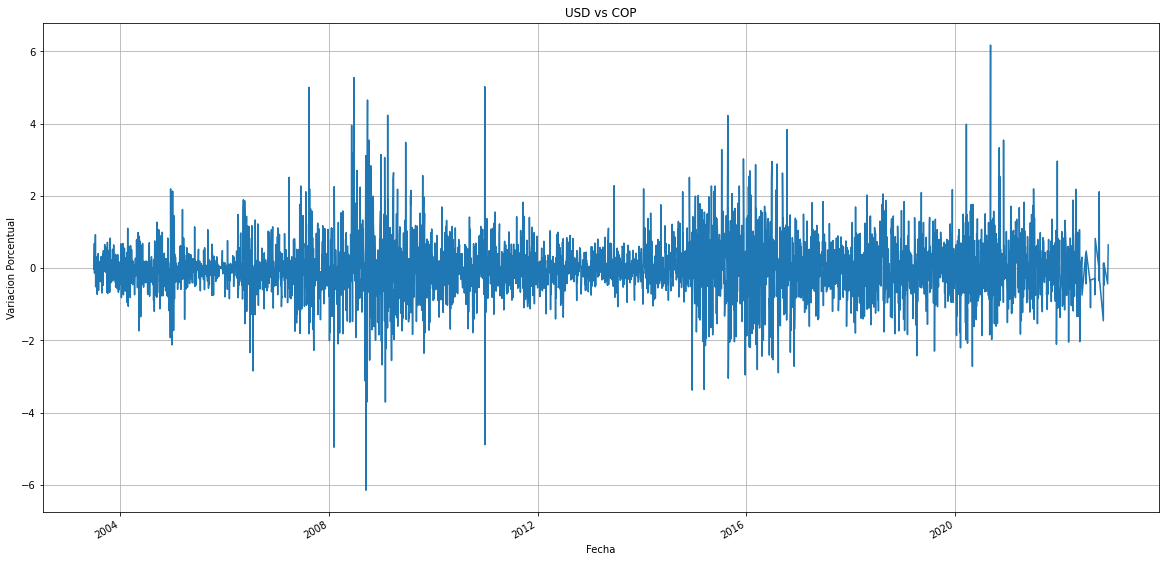

In [98]:
ax1 = df_usd.plot(use_index=True, y='Último', style=['-'], figsize=(20,10), ylabel='Precio de Cierre', legend=False, grid=True)
ax2 = df_usd.plot(use_index=True, y='Variacion Porcentual', style=['-'], figsize=(20, 10), ylabel='Variacion Porcentual', legend=False, grid=True)
plt.title('USD vs COP')

;

We see there is a strange behaviuor in the USD price and also see there is pretty high variation percentage in some parts of 2007 and 2008 ans subsequent years as well.


<AxesSubplot:xlabel='Fecha', ylabel='Variacion Porcentual Precio de Cierre: Enero 2008 a Marzo 2008'>

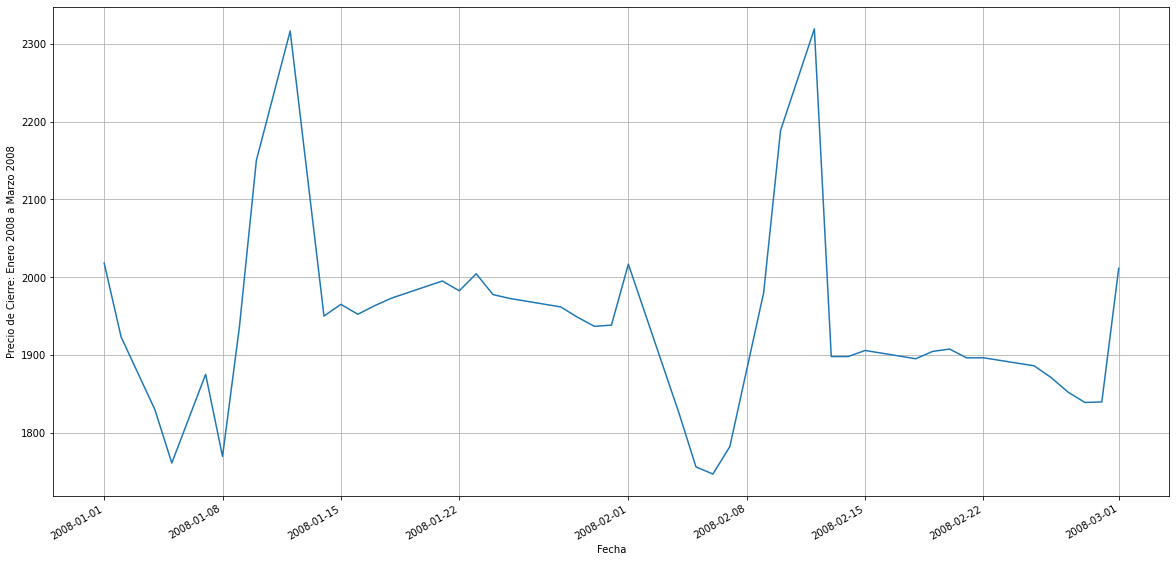

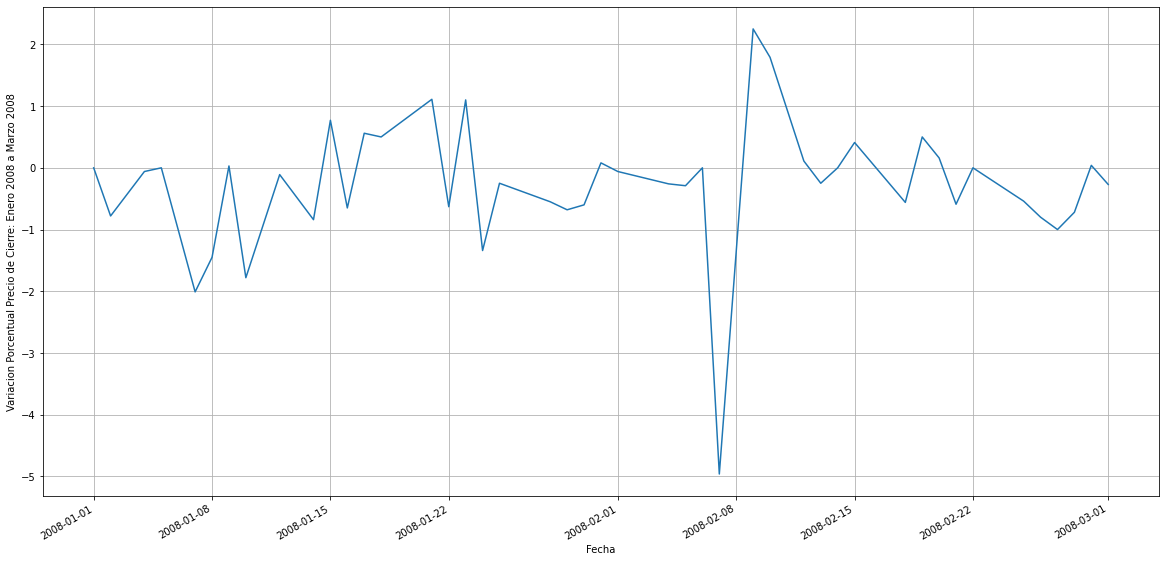

In [109]:
df_usd.loc['2008-01-01':'2008-03-01'].plot(use_index=True, y='Último', style=['-'], figsize=(20,10), ylabel='Precio de Cierre: Enero 2008 a Marzo 2008', legend=False, grid=True)
df_usd.loc['2008-01-01':'2008-03-01'].plot(use_index=True, y='Variacion Porcentual', style=['-'], figsize=(20,10), ylabel='Variacion Porcentual Precio de Cierre: Enero 2008 a Marzo 2008', legend=False, grid=True)


In [112]:
df1 = df_usd.loc['2008-01-01':'2008-03-01'].sort_values(by='Fecha')

After plotting, we see that in a period of 7 days, starting from January 8th 2008 till January 15th we still see a lot of variation in the USD price